## HEART Patch Catalogue

> A library of pre-optimized, __ready-to-use__ patches to support T&E of defenses against adversarial patches.

Motivation:
- patch creation is complex
- patch creation is time-consuming
- patch creation is not standardized, tricky to reproduce
- no resources available to search for patches (outside of research, and even then..) 
- patch optimization is complex
- tracking patch lineage is non-existant
- benchmark evaluation of patches time-consuming



> ‼️  🧪 Experimental Feature  ‼️

#### Search the catalogue for foundation patches

> Adversarial patches that have been trained using a dataset and model are now __searchable__ using MLFlow

__FOUNDATION__ patches are trained from scratch using logged model and dataset...
__FINE-TUNED__ patches are optimized from FOUNDATION patches using logged model and dataset...

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.map_50_adv_vs_pred,metrics.time_to_train,metrics.map_50_benign,metrics.map_50_adv_vs_gt,...,params.input_shape,params.scale_min,params.model_optimizer,params.postprocessing,params.device_type,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.workflow_task
0,31fa085f78424d93b0a0865c6e529422,367259943238983519,FINISHED,../../patches/367259943238983519/31fa085f78424...,2025-07-03 09:50:34.873000+00:00,2025-07-03 09:54:08.997000+00:00,0.42007,188.41064,0.787567,0.507045,...,"(3, 200, 200)",0.3,None,None,cpu,kieranfraser,gaudy-pug-845,LOCAL,./env/lib/python3.11/site-packages/ipykernel_l...,OBJECT_DETECTION


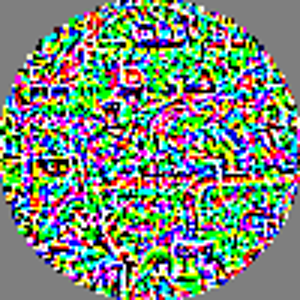

In [13]:
from heart_library.catalogue.workflows import SearchPatches
%matplotlib inline

workflow = SearchPatches(local_catalogue_path="../../patches")
meta, patches = workflow.run(["FOUNDATION"])
display(meta)
patches[0].resize([300, 300])

#### Filter the catalogue for patches of interest

> Enabling the T&E users to __filter__ existing patches based on metadata associated with creation:

- model
- dataset
- training
- patch

__Use Case:__ 

Jamie is T&E user, who is only interested in patches effective on "satellite" imagery for transformer based vision models. Sifting through literature on adversarial patches and determining which patch would be effective for satellite images and transformers is time-consuming (both the research and then reproducing such research.) 

But Jamie can, using __HEART Catalogue__, simply filter for patches trained using datasets with the "satellite" image tag and models that are of the "transformer" family. 

> Jamie immediately gets a patch and the metrics associated with patch effectiveness across a host of datasets and models. Jamie can then use this patch as is or further optimize the patch for their model and specific dataset.

,run_id,metrics.map_50_benign,metrics.map_50_adv_vs_pred,params.model_type
0,31fa085f78424d93b0a0865c6e529422,0.787567,0.42007,fasterrcnn_resnet50_fpn


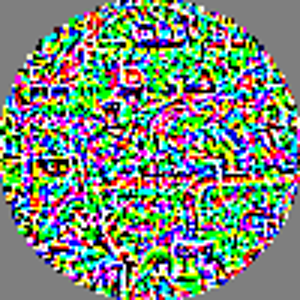

In [16]:
workflow = SearchPatches(local_catalogue_path="../../patches")
meta, patches = workflow.run(["FOUNDATION"], patch_filter="metrics.map_50_adv_vs_pred<0.5")
display(meta[['run_id', 'metrics.map_50_benign', 'metrics.map_50_adv_vs_pred', 'params.model_type']])
patches[0].resize([300, 300])

#### Create a foundation patch for a task with a given model and dataset

T&E users, and the wider research community, have the opportunity to share foundation patches with the catalogue. 

> The _create_ workflow, standardizes patch creation ensuring the correct information is logged for future searches, reproducability and reporting of metrics.

In [ ]:
from heart_library.catalogue.workflows import CreateObjectDetectionPatch

workflow = CreateObjectDetectionPatch(local_catalogue_path="../../patches")
success = workflow.run(model_type="fasterrcnn_resnet50_fpn", num_data_samples=100, max_iter=10)

#### Optimize an existing foundation patch on your own model and dataset

The `OptimizeObjectDetectionPatch` workflow standardizes the process of selecting an existing Foundation patch from the catalogue and optimizing it further on your task. The `run_id` references an existing Foundation Patch in the catalogue for optimization. The remaining parameters specify how to optimize the patch e.g. with `num_data_samples` and `max_iter`

In [ ]:
from heart_library.catalogue.workflows import OptimizeObjectDetectionPatch

workflow = OptimizeObjectDetectionPatch(local_catalogue_path="../../patches")
success = workflow.run(run_id="31fa085f78424d93b0a0865c6e529422", model_type="fasterrcnn_resnet50_fpn", num_data_samples=10, max_iter=30)

### Search the catalogue for optimized foundation patches

The following code snippet demonstrates how to retrieve all optimized patches from the catalogue. Note the use of `OptimizeObjectDetectionPatch.PATCH_TYPE` which is simply a string value `FINE-TUNED` identifying stored foundation patches which have been fine-tuned / optimized further. A user can further filter patches optimized on specific datasets or optimized patches that received a particular performance.

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.map_50_adv_vs_pred,metrics.time_to_train,metrics.map_50_benign,metrics.map_50_adv_vs_gt,...,params.input_shape,params.scale_min,params.model_optimizer,params.postprocessing,params.device_type,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.workflow_task
0,ccffa673b3694d5083e9d1806ff17271,741215180938188070,FINISHED,../../patches/741215180938188070/ccffa673b3694...,2025-07-03 09:58:35.890000+00:00,2025-07-03 10:08:38.575000+00:00,0.421168,577.829513,0.787567,0.506494,...,"(3, 200, 200)",0.3,None,None,cpu,kieranfraser,fortunate-steed-747,LOCAL,./env/lib/python3.11/site-packages/ipykernel_l...,OBJECT_DETECTION


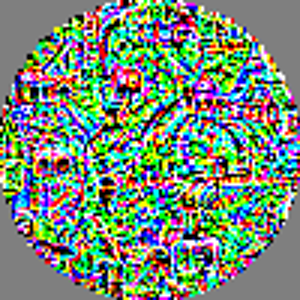

In [20]:
from heart_library.catalogue.workflows import SearchPatches
%matplotlib inline

workflow = SearchPatches(local_catalogue_path="../../patches")
meta, patches = workflow.run([OptimizeObjectDetectionPatch.PATCH_TYPE])
display(meta)
patches[0].resize([300, 300])

#### View the catalogue locally in MLFlow

MLFlow provides a user-friendly UI with which T&E users can locally explore the catalogue

In [ ]:
!mlflow ui --port 8000 --backend-store-uri ../../patches